In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
import numpy as np
import statsmodels.formula.api as smf
from datetime import datetime
import yfinance as yf
import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings("ignore")
import requests

# Fama Macbeth

In [2]:
start_date = "2014-12-31"
end_date = "2023-12-31"
ticker =  ["O39.SI", "C09.SI", "G13.SI", "D05.SI", "U14.SI", "BN4.SI", "S63.SI", "BS6.SI", "C52.SI", "ME8U.SI", "Y92.SI", "EMI.SI", "C38U.SI", "V03.SI", "S58.SI", "M44U.SI", "N2IU.SI", "D01.SI", "U96.SI", "F34.SI", "YF8.SI", "J36.SI", "Z74.SI", "S51.SI", "9CI.SI", "C07.SI", "A17U.SI", "BUOU.SI", "AJBU.SI", "H78.SI", "^STI"]
df = pd.DataFrame()
for i in ticker:
    # Use yfinance to fetch the gold price data
    data = yf.download(i, start=start_date, end=end_date, interval = "1mo")
    df = pd.concat([df, data["Adj Close"]], axis=1)
    
df.columns = ticker

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [3]:
df

,O39.SI,C09.SI,G13.SI,D05.SI,U14.SI,BN4.SI,S63.SI,BS6.SI,C52.SI,ME8U.SI,...,J36.SI,Z74.SI,S51.SI,9CI.SI,C07.SI,A17U.SI,BUOU.SI,AJBU.SI,H78.SI,^STI
2015-01-01,7.146807,9.043452,0.848877,13.344144,5.891369,5.958687,2.251860,0.859395,2.027682,0.908570,...,47.860733,2.841365,2.868460,NaN,30.368620,1.473579,NaN,0.663455,5.209520,3391.199951
2015-02-01,7.201783,9.205421,0.774207,13.195800,6.405437,5.992934,2.352389,0.848999,2.077138,0.933296,...,48.181950,2.938863,2.858898,NaN,30.655796,1.479570,NaN,0.669896,5.307944,3402.860107
2015-03-01,7.263629,9.052450,0.723117,13.728492,6.234080,6.164159,2.332283,0.876721,2.041812,0.954439,...,47.210842,3.050289,2.791967,NaN,29.478378,1.551451,NaN,0.663455,5.307944,3447.010010
2015-04-01,7.339220,9.601356,0.805647,14.220721,6.511514,5.972385,2.426111,1.015334,2.168983,0.972561,...,47.064541,3.085110,2.839775,NaN,29.011723,1.479570,NaN,0.663455,5.795613,3487.389893
2015-05-01,7.127282,9.502374,0.723117,13.885639,6.110607,6.232651,2.321778,1.001473,2.194293,0.979320,...,46.707420,2.876186,2.920197,NaN,28.265079,1.478689,NaN,0.676338,6.160522,3392.110107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,12.166208,6.640120,0.860497,32.357918,6.640000,6.796216,3.731445,1.690000,1.241450,2.255284,...,46.942604,2.305955,0.145000,3.24,33.142735,2.753930,1.161248,2.200000,3.492432,3233.300049
2023-09-01,12.810000,6.610000,0.845000,33.153198,6.420000,6.800000,3.869587,1.660000,1.300000,2.225101,...,46.419998,2.367126,0.134000,3.10,31.665098,2.750000,1.035446,2.080000,3.570000,3217.409912
2023-10-01,12.680000,6.320000,0.860000,32.374630,5.900000,6.210000,3.721137,1.450000,1.320000,2.116800,...,40.450001,2.328000,0.112000,2.94,28.200001,2.600000,1.006415,1.690000,3.170000,3067.739990
2023-11-01,12.540000,6.260000,0.915000,31.280693,5.900000,6.670000,3.671654,1.450000,1.290000,2.244793,...,38.610001,2.259529,0.105000,3.03,28.520000,2.840000,1.074154,1.840000,3.220000,3072.989990


In [4]:
df.isnull().sum()

O39.SI      0
C09.SI      0
G13.SI      0
D05.SI      0
U14.SI      0
BN4.SI      0
S63.SI      0
BS6.SI      0
C52.SI      0
ME8U.SI     0
Y92.SI      0
EMI.SI     91
C38U.SI     0
V03.SI      0
S58.SI      0
M44U.SI     0
N2IU.SI     0
D01.SI      0
U96.SI      0
F34.SI      0
YF8.SI     88
J36.SI      0
Z74.SI      0
S51.SI      0
9CI.SI     81
C07.SI      0
A17U.SI     0
BUOU.SI    18
AJBU.SI     0
H78.SI      0
^STI        0
dtype: int64

In [5]:
df = df.drop(["EMI.SI", "YF8.SI", "9CI.SI", "BUOU.SI"], axis=1)

In [6]:
df.isnull().sum()

O39.SI     0
C09.SI     0
G13.SI     0
D05.SI     0
U14.SI     0
BN4.SI     0
S63.SI     0
BS6.SI     0
C52.SI     0
ME8U.SI    0
Y92.SI     0
C38U.SI    0
V03.SI     0
S58.SI     0
M44U.SI    0
N2IU.SI    0
D01.SI     0
U96.SI     0
F34.SI     0
J36.SI     0
Z74.SI     0
S51.SI     0
C07.SI     0
A17U.SI    0
AJBU.SI    0
H78.SI     0
^STI       0
dtype: int64

In [7]:
sg = df.pct_change().dropna()

In [8]:
sg

,O39.SI,C09.SI,G13.SI,D05.SI,U14.SI,BN4.SI,S63.SI,BS6.SI,C52.SI,ME8U.SI,...,U96.SI,F34.SI,J36.SI,Z74.SI,S51.SI,C07.SI,A17U.SI,AJBU.SI,H78.SI,^STI
2015-02-01,0.007692,0.017910,-0.087963,-0.011117,0.087258,0.005747,0.044643,-0.012097,0.024390,0.027214,...,-0.018561,0.006211,0.006711,0.034314,-0.003334,0.009456,0.004065,0.009709,0.018893,0.003438
2015-03-01,0.008588,-0.016618,-0.065990,0.040368,-0.026752,0.028571,-0.008547,0.032653,-0.017007,0.022654,...,-0.002364,0.006173,-0.020155,0.037915,-0.023411,-0.038408,0.048583,-0.009615,0.000000,0.012974
2015-04-01,0.010407,0.060636,0.114130,0.035855,0.044503,-0.031111,0.040230,0.158103,0.062283,0.018987,...,0.071090,0.000000,-0.003099,0.011415,0.017123,-0.015830,-0.046332,0.000000,0.091875,0.011714
2015-05-01,-0.028877,-0.010309,-0.102439,-0.023563,-0.061569,0.043578,-0.043004,-0.013652,0.011669,0.006949,...,-0.057733,0.030675,-0.007588,-0.067720,0.028320,-0.025736,-0.000595,0.019418,0.062963,-0.027321
2015-06-01,-0.001961,-0.070342,-0.017589,0.019212,-0.058504,-0.060572,-0.029412,0.016640,0.022876,-0.021944,...,-0.064904,-0.007057,-0.076785,0.019370,-0.056478,-0.121139,0.025000,0.000000,-0.047619,-0.022045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,-0.056391,-0.096076,-0.069149,-0.028021,-0.055477,-0.059621,0.021448,0.097403,0.007936,0.026786,...,-0.018349,-0.020725,-0.036857,-0.105263,0.028369,-0.025088,-0.014235,0.027635,-0.002809,-0.041696
2023-09-01,0.052916,-0.004536,-0.018010,0.024578,-0.033132,0.000557,0.037021,-0.017752,0.047163,-0.013383,...,-0.040480,0.003497,-0.011133,0.026528,-0.075862,-0.044584,-0.001427,-0.054546,0.022210,-0.004915
2023-10-01,-0.010148,-0.043873,0.017751,-0.023484,-0.080997,-0.086765,-0.038363,-0.126506,0.015385,-0.048673,...,-0.098232,-0.045576,-0.128608,-0.016529,-0.164179,-0.109430,-0.054545,-0.187500,-0.112045,-0.046519
2023-11-01,-0.011041,-0.009494,0.063953,-0.033790,0.000000,0.074074,-0.013298,0.000000,-0.022727,0.060465,...,0.119826,0.019663,-0.045488,-0.029412,-0.062500,0.011348,0.092308,0.088757,0.015773,0.001711


<Axes: >

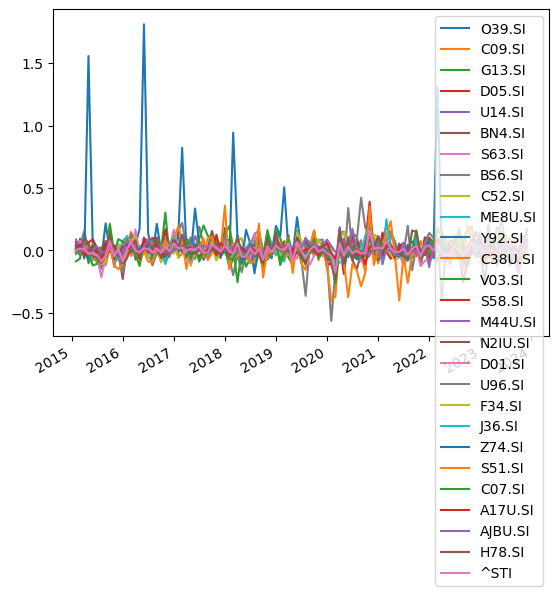

In [9]:
sg.plot()

In [10]:
rf = pd.read_excel("SG_1YTB.xlsx", header=0)["Price"].iloc[::-1]/100
rf

106    0.00690
105    0.00900
104    0.00830
103    0.00750
102    0.00730
        ...   
4      0.04114
3      0.04055
2      0.04054
1      0.04014
0      0.04102
Name: Price, Length: 107, dtype: float64

<Axes: >

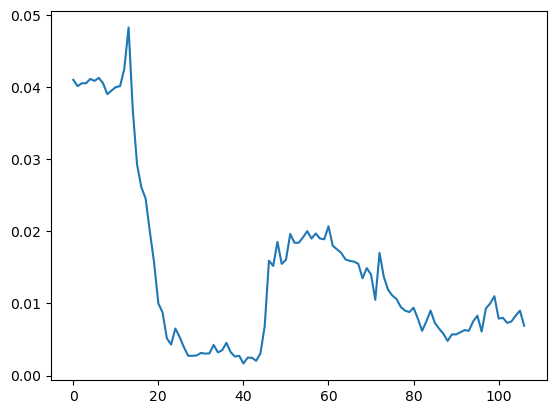

In [11]:
rf.plot()

In [12]:
sg = sg.sub(rf.to_list(), axis=0)

In [13]:
sg

,O39.SI,C09.SI,G13.SI,D05.SI,U14.SI,BN4.SI,S63.SI,BS6.SI,C52.SI,ME8U.SI,...,U96.SI,F34.SI,J36.SI,Z74.SI,S51.SI,C07.SI,A17U.SI,AJBU.SI,H78.SI,^STI
2015-02-01,0.000792,0.011010,-0.094863,-0.018017,0.080358,-0.001153,0.037743,-0.018997,0.017490,0.020314,...,-0.025461,-0.000689,-0.000189,0.027414,-0.010234,0.002556,-0.002835,0.002809,0.011993,-0.003462
2015-03-01,-0.000412,-0.025618,-0.074990,0.031368,-0.035752,0.019571,-0.017547,0.023653,-0.026007,0.013654,...,-0.011364,-0.002827,-0.029155,0.028915,-0.032411,-0.047408,0.039583,-0.018615,-0.009000,0.003974
2015-04-01,0.002107,0.052336,0.105830,0.027555,0.036203,-0.039411,0.031930,0.149803,0.053983,0.010687,...,0.062790,-0.008300,-0.011399,0.003115,0.008823,-0.024130,-0.054632,-0.008300,0.083575,0.003414
2015-05-01,-0.036377,-0.017809,-0.109939,-0.031063,-0.069069,0.036078,-0.050504,-0.021152,0.004169,-0.000551,...,-0.065233,0.023175,-0.015088,-0.075220,0.020820,-0.033236,-0.008095,0.011918,0.055463,-0.034821
2015-06-01,-0.009261,-0.077642,-0.024889,0.011912,-0.065804,-0.067872,-0.036712,0.009340,0.015576,-0.029244,...,-0.072204,-0.014357,-0.084085,0.012070,-0.063778,-0.128439,0.017700,-0.007300,-0.054919,-0.029345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,-0.097531,-0.137216,-0.110289,-0.069161,-0.096617,-0.100761,-0.019692,0.056263,-0.033204,-0.014354,...,-0.059489,-0.061865,-0.077997,-0.146403,-0.012771,-0.066228,-0.055375,-0.013505,-0.043949,-0.082836
2023-09-01,0.012366,-0.045086,-0.058560,-0.015972,-0.073682,-0.039993,-0.003529,-0.058302,0.006613,-0.053933,...,-0.081030,-0.037053,-0.051683,-0.014022,-0.116412,-0.085134,-0.041977,-0.095096,-0.018340,-0.045465
2023-10-01,-0.050688,-0.084413,-0.022789,-0.064024,-0.121537,-0.127305,-0.078903,-0.167046,-0.025155,-0.089213,...,-0.138772,-0.086116,-0.169148,-0.057069,-0.204719,-0.149970,-0.095085,-0.228040,-0.152585,-0.087059
2023-11-01,-0.051181,-0.049634,0.023813,-0.073930,-0.040140,0.033934,-0.053438,-0.040140,-0.062867,0.020325,...,0.079686,-0.020477,-0.085628,-0.069552,-0.102640,-0.028792,0.052168,0.048617,-0.024367,-0.038429


<Axes: >

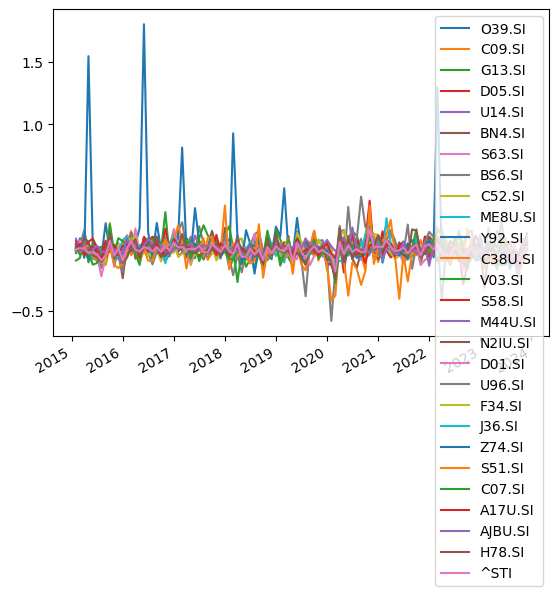

In [14]:
sg.plot()

In [15]:
from statsmodels.regression.linear_model import OLS
from statsmodels.regression.rolling import RollingOLS
from statsmodels.tools.tools import add_constant

In [16]:
k = list(sg.columns)

In [17]:
k.pop(-1)
k

['O39.SI',
 'C09.SI',
 'G13.SI',
 'D05.SI',
 'U14.SI',
 'BN4.SI',
 'S63.SI',
 'BS6.SI',
 'C52.SI',
 'ME8U.SI',
 'Y92.SI',
 'C38U.SI',
 'V03.SI',
 'S58.SI',
 'M44U.SI',
 'N2IU.SI',
 'D01.SI',
 'U96.SI',
 'F34.SI',
 'J36.SI',
 'Z74.SI',
 'S51.SI',
 'C07.SI',
 'A17U.SI',
 'AJBU.SI',
 'H78.SI']

In [18]:
datas = []
for stock in k:
    print(stock)
    fm1_model = RollingOLS(exog=add_constant(sg["^STI"]),endog=sg[stock], window=60)
    fm1_result = fm1_model.fit(cov_type="HCCM")
    data = fm1_result.params.dropna()
    data["beta^2"] = np.square(fm1_result.params.dropna()["^STI"])
    data["idiosyncratic risk"] = np.square(np.array(sg[stock].tail(48).to_list()) - np.array((fm1_result.params.dropna()["^STI"]*sg["^STI"].tail(48).to_list() + fm1_result.params.dropna()["const"]).to_list()))
    data["return"] = sg[stock].tail(48).to_list()
    datas.append(data)
    

O39.SI
C09.SI
G13.SI
D05.SI
U14.SI
BN4.SI
S63.SI
BS6.SI
C52.SI
ME8U.SI
Y92.SI
C38U.SI
V03.SI
S58.SI
M44U.SI
N2IU.SI
D01.SI
U96.SI
F34.SI
J36.SI
Z74.SI
S51.SI
C07.SI
A17U.SI
AJBU.SI
H78.SI


In [19]:
datas

[                        const      ^STI    beta^2  idiosyncratic risk  \
 2020-01-01 00:00:00  0.007183  1.141111  1.302135        3.326088e-05   
 2020-02-01 00:00:00  0.007467  1.127697  1.271701        5.923647e-04   
 2020-03-01 00:00:00  0.007660  1.119976  1.254347        2.842905e-05   
 2020-04-01 00:00:00  0.007181  1.106627  1.224624        5.922104e-04   
 2020-05-01 00:00:00  0.007082  1.109063  1.230021        1.716928e-04   
 2020-06-01 00:00:00  0.007831  1.127035  1.270207        1.919503e-03   
 2020-07-01 00:00:00  0.006794  1.139560  1.298598        8.350236e-04   
 2020-08-01 00:00:00  0.007165  1.113193  1.239200        2.200482e-05   
 2020-09-01 00:00:00  0.006781  1.128941  1.274508        1.420450e-04   
 2020-10-01 00:00:00  0.008653  1.173028  1.375995        1.475466e-04   
 2020-11-01 00:00:00  0.008660  1.181134  1.395077        8.267125e-06   
 2020-12-01 00:00:00  0.008527  1.179938  1.392254        1.152553e-04   
 2021-01-01 00:00:00  0.008167  1.1734

In [20]:
df2s = []
for i in range(len(datas[0])):
    df2 = pd.concat([d.iloc[[i]] for d in datas], ignore_index=True)
    df2s.append(df2)

In [21]:
df2s

[       const      ^STI    beta^2  idiosyncratic risk    return
 0   0.007183  1.141111  1.302135            0.000033 -0.028861
 1   0.007515  1.257029  1.580122            0.000074 -0.047163
 2   0.007984  1.440773  2.075828            0.001268 -0.080417
 3   0.016388  1.510451  2.281463            0.000016 -0.034906
 4   0.007777  1.173153  1.376287            0.000435 -0.056065
 5   0.006903  1.407938  1.982289            0.000262 -0.028494
 6   0.004274  0.696479  0.485083            0.002420  0.027947
 7   0.013877  1.707280  2.914806            0.013996 -0.166986
 8  -0.004249  0.627583  0.393861            0.005805 -0.103435
 9   0.007085  0.263161  0.069254            0.003202  0.054031
 10  0.115394  0.727973  0.529944            0.044379 -0.121942
 11 -0.000244  0.281491  0.079237            0.000390  0.009190
 12  0.013066  0.501461  0.251463            0.000003 -0.007175
 13  0.003394  0.338752  0.114753            0.011024 -0.114014
 14  0.007665  0.528954  0.279793       

<Axes: >

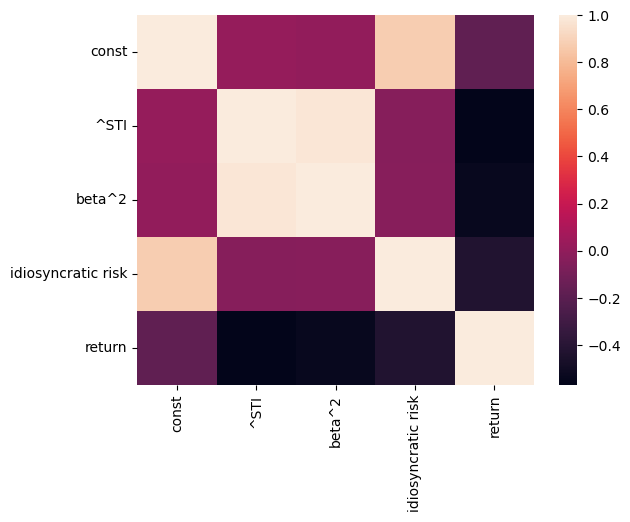

In [27]:
sns.heatmap(df2s[0].corr())

<Axes: >

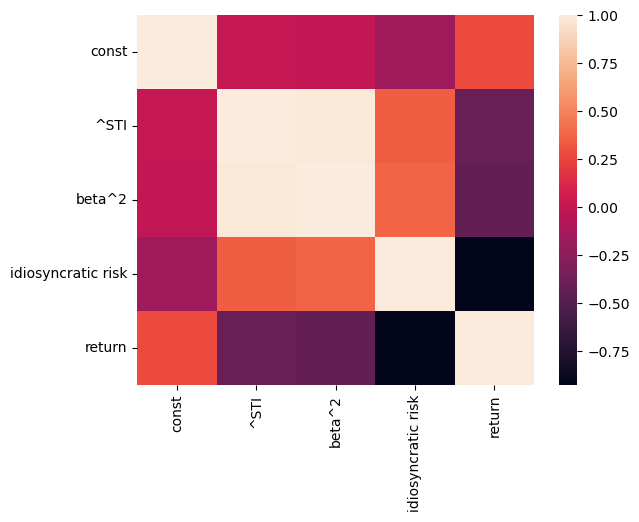

In [28]:
sns.heatmap(df2s[1].corr())

In [22]:
consts = []
beta_coefs = []
betasq_coefs = []
sigmasq_coefs = []
for d in df2s:
    fm2_model = OLS(endog=d["return"], exog=add_constant(d[["^STI", "beta^2", "idiosyncratic risk"]]))
    fm2_result = fm2_model.fit(cov_type='HC0')
    consts.append(fm2_result.params["const"])
    beta_coefs.append(fm2_result.params["^STI"])
    betasq_coefs.append(fm2_result.params["beta^2"])
    sigmasq_coefs.append(fm2_result.params["idiosyncratic risk"])
    print(fm2_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     11.09
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           0.000123
Time:                        10:29:53   Log-Likelihood:                 45.574
No. Observations:                  26   AIC:                            -83.15
Df Residuals:                      22   BIC:                            -78.12
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0626      0

In [23]:
from scipy.stats import t

In [24]:
len(beta_coefs)

48

In [25]:
const = np.array(consts).mean()
const_std = np.array(consts).std()
const_tratio = np.array(consts).mean()/np.array(consts).std()
const_pval = 2*(1 - t.cdf(abs(const_tratio), 48))
print(f"coefficient of const: {const}")
print(f"std of const: {const_std}")
print(f"t-ratio of const: {const_tratio}")
print(f"p-value of const: {const_pval}")

print("\n")
beta_coef = np.array(beta_coefs).mean()
beta_std = np.array(beta_coefs).std()
beta_tratio = np.array(beta_coefs).mean()/np.array(beta_coefs).std()
beta_pval = 2*(1 - t.cdf(abs(beta_tratio), 48))
print(f"coefficient of beta: {beta_coef}")
print(f"std of beta: {beta_std}")
print(f"t-ratio of beta: {beta_tratio}")
print(f"p-value of beta: {beta_pval}")

print("\n")
betasq_coef = np.array(betasq_coefs).mean()
betasq_std = np.array(betasq_coefs).std()
betasq_tratio = np.array(betasq_coefs).mean()/np.array(betasq_coefs).std()
betasq_pval = 2*(1 - t.cdf(abs(betasq_tratio), 48))
print(f"coefficient of betasq: {betasq_coef}")
print(f"std of betasq: {betasq_std}")
print(f"t-ratio of betasq: {betasq_tratio}")
print(f"p-value of betasq: {betasq_pval}")

print("\n")
sigmasq_coef = np.array(sigmasq_coefs).mean()
sigmasq_std = np.array(sigmasq_coefs).std()
sigmasq_tratio = np.array(sigmasq_coefs).mean()/np.array(sigmasq_coefs).std()
sigmasq_pval = 2*(1 - t.cdf(abs(sigmasq_tratio), 48))
print(f"coefficient of sigmasq: {sigmasq_coef}")
print(f"std of sigmasq: {sigmasq_std}")
print(f"t-ratio of sigmasq: {sigmasq_tratio}")
print(f"p-value of sigmasq: {sigmasq_pval}")

coefficient of const: -0.028343312272159887
std of const: 0.05674651514309893
t-ratio of const: -0.4994722971214344
p-value of const: 0.6197285095180858


coefficient of beta: 0.03353326223847953
std of beta: 0.12370979284882486
t-ratio of beta: 0.2710639268425391
p-value of beta: 0.7875041780980561


coefficient of betasq: -0.020006271819202493
std of betasq: 0.06312562054251654
t-ratio of betasq: -0.3169279231992312
p-value of betasq: 0.7526726656629439


coefficient of sigmasq: 0.7642881617806748
std of sigmasq: 4.922158188918048
t-ratio of sigmasq: 0.15527500995425647
p-value of sigmasq: 0.8772556509522875


In [29]:
consts = []
beta_coefs = []
for d in df2s:
    fm2_model = OLS(endog=d["return"], exog=add_constant(d[["^STI"]]))
    fm2_result = fm2_model.fit(cov_type='HC0')
    consts.append(fm2_result.params["const"])
    beta_coefs.append(fm2_result.params["^STI"])
    print(fm2_result.summary())
    
beta_coef = np.array(beta_coefs).mean()
beta_std = np.array(beta_coefs).std()
beta_tratio = np.array(beta_coefs).mean()/np.array(beta_coefs).std()
beta_pval = 2*(1 - t.cdf(abs(beta_tratio), 48))
print(f"coefficient of beta: {beta_coef}")
print(f"std of beta: {beta_std}")
print(f"t-ratio of beta: {beta_tratio}")
print(f"p-value of beta: {beta_pval}")

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     11.70
Date:                Fri, 26 Jan 2024   Prob (F-statistic):            0.00224
Time:                        10:34:30   Log-Likelihood:                 40.588
No. Observations:                  26   AIC:                            -77.18
Df Residuals:                      24   BIC:                            -74.66
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0240      0.025      0.979      0.3

In [30]:
consts = []
betasq_coefs = []
for d in df2s:
    fm2_model = OLS(endog=d["return"], exog=add_constant(d[["beta^2"]]))
    fm2_result = fm2_model.fit(cov_type='HC0')
    consts.append(fm2_result.params["const"])
    betasq_coefs.append(fm2_result.params["beta^2"])
    print(fm2_result.summary())
    
betasq_coef = np.array(betasq_coefs).mean()
betasq_std = np.array(betasq_coefs).std()
betasq_tratio = np.array(betasq_coefs).mean()/np.array(betasq_coefs).std()
betasq_pval = 2*(1 - t.cdf(abs(betasq_tratio), 48))
print(f"coefficient of betasq: {betasq_coef}")
print(f"std of betasq: {betasq_std}")
print(f"t-ratio of betasq: {betasq_tratio}")
print(f"p-value of betasq: {betasq_pval}")

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     10.94
Date:                Fri, 26 Jan 2024   Prob (F-statistic):            0.00296
Time:                        10:37:47   Log-Likelihood:                 39.941
No. Observations:                  26   AIC:                            -75.88
Df Residuals:                      24   BIC:                            -73.37
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0068      0.018     -0.387      0.6

In [31]:
consts = []
sigmasq_coefs = []
for d in df2s:
    fm2_model = OLS(endog=d["return"], exog=add_constant(d[["idiosyncratic risk"]]))
    fm2_result = fm2_model.fit(cov_type='HC0')
    consts.append(fm2_result.params["const"])
    sigmasq_coefs.append(fm2_result.params["idiosyncratic risk"])
    print(fm2_result.summary())
    
print("\n")
sigmasq_coef = np.array(sigmasq_coefs).mean()
sigmasq_std = np.array(sigmasq_coefs).std()
sigmasq_tratio = np.array(sigmasq_coefs).mean()/np.array(sigmasq_coefs).std()
sigmasq_pval = 2*(1 - t.cdf(abs(sigmasq_tratio), 48))
print(f"coefficient of sigmasq: {sigmasq_coef}")
print(f"std of sigmasq: {sigmasq_std}")
print(f"t-ratio of sigmasq: {sigmasq_tratio}")
print(f"p-value of sigmasq: {sigmasq_pval}")

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     8.627
Date:                Fri, 26 Jan 2024   Prob (F-statistic):            0.00720
Time:                        10:39:01   Log-Likelihood:                 38.139
No. Observations:                  26   AIC:                            -72.28
Df Residuals:                      24   BIC:                            -69.76
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0303      0

# Fama French

In [325]:
port = pd.read_csv("Japan_25_Portfolios_ME_BE-ME.csv", header=12, nrows=402)/100

In [326]:
port

,,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,1990.07,0.0614,0.0434,0.0610,0.0656,0.0781,0.0186,0.0569,0.0496,0.0818,...,0.0527,0.0237,0.0281,0.0588,0.0666,-0.0010,-0.0258,-0.0030,-0.0045,0.0013
1,1990.08,-0.1686,-0.1806,-0.1598,-0.1593,-0.1513,-0.1799,-0.1499,-0.1556,-0.1430,...,-0.1318,-0.1543,-0.1556,-0.1216,-0.1461,-0.0965,-0.1003,-0.0923,-0.1177,-0.0962
2,1990.09,-0.1503,-0.1445,-0.1577,-0.1348,-0.1643,-0.1283,-0.1766,-0.1611,-0.1831,...,-0.1854,-0.1608,-0.1740,-0.1890,-0.1872,-0.1932,-0.1610,-0.1784,-0.1576,-0.1425
3,1990.10,0.2404,0.2185,0.2195,0.2024,0.2599,0.2937,0.2558,0.2771,0.2769,...,0.2831,0.3214,0.2926,0.2597,0.3018,0.2567,0.3010,0.2598,0.2391,0.1928
4,1990.11,-0.2143,-0.1892,-0.1738,-0.1657,-0.1969,-0.1763,-0.1900,-0.1556,-0.1876,...,-0.2033,-0.1691,-0.1695,-0.1713,-0.1787,-0.1458,-0.1012,-0.1178,-0.1325,-0.1320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,2023.08,-0.0248,-0.0127,-0.0154,-0.0137,0.0003,-0.0342,-0.0487,-0.0028,0.0029,...,-0.0431,-0.0091,0.0057,0.0122,-0.0061,-0.0361,-0.0355,-0.0039,-0.0259,-0.0008
398,2023.09,-0.0430,-0.0259,-0.0246,-0.0100,0.0155,-0.0675,-0.0344,-0.0274,-0.0103,...,-0.0763,-0.0575,-0.0369,-0.0130,0.0119,-0.0704,-0.0446,-0.0020,-0.0087,0.0611
399,2023.10,-0.1083,-0.0830,-0.0458,-0.0539,-0.0396,-0.0838,-0.0418,-0.0464,-0.0393,...,-0.0717,-0.0363,-0.0434,-0.0365,-0.0341,-0.0449,-0.0316,-0.0500,-0.0592,-0.0406
400,2023.11,0.0584,0.0902,0.0621,0.0735,0.0618,0.1064,0.0961,0.1050,0.0613,...,0.1189,0.0529,0.0611,0.0537,0.0362,0.1242,0.0815,0.0859,0.0624,0.0443


In [327]:
start_date = "2012-07-31"
end_date = "2024-01-01"
ticker =  ["^N225"]
df = pd.DataFrame()
for i in ticker:
    # Use yfinance to fetch the gold price data
    data = yf.download(i, start=start_date, end=end_date, interval = "1mo")
    df = pd.concat([df, data["Adj Close"]], axis=1)
    
df.columns = ticker

[*********************100%%**********************]  1 of 1 completed


In [328]:
df = df.pct_change().dropna()
df

,^N225
2012-09-01,0.003422
2012-10-01,0.006553
2012-11-01,0.057986
2012-12-01,0.100484
2013-01-01,0.071522
...,...
2023-08-01,-0.016667
2023-09-01,-0.023352
2023-10-01,-0.031351
2023-11-01,0.085163


In [329]:
ff = pd.read_csv("Japan_3_Factors.csv", header=2, nrows=402)/100
ff = ff.tail(136)
ff

,Unnamed: 0,Mkt-RF,SMB,HML,RF
266,2012.09,0.0227,-0.0050,0.0111,0.0001
267,2012.10,-0.0190,0.0092,-0.0165,0.0001
268,2012.11,0.0171,-0.0068,0.0084,0.0001
269,2012.12,0.0383,-0.0272,0.0707,0.0001
270,2013.01,0.0378,0.0191,-0.0110,0.0000
...,...,...,...,...,...
397,2023.08,-0.0223,0.0064,0.0345,0.0045
398,2023.09,-0.0256,-0.0077,0.0819,0.0043
399,2023.10,-0.0496,-0.0077,0.0234,0.0047
400,2023.11,0.0750,-0.0089,-0.0486,0.0044


In [330]:
port = port.tail(136).reset_index(drop=True)

In [331]:
port = port.iloc[: , 1:]
port

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,0.0281,0.0158,-0.0007,0.0063,0.0096,0.0399,0.0060,-0.0062,0.0263,0.0244,...,0.0215,0.0145,0.0154,0.0359,0.0256,0.0099,0.0203,0.0170,0.0465,0.0483
1,0.0205,0.0380,0.0061,-0.0146,-0.0177,0.0071,-0.0086,-0.0262,-0.0406,-0.0317,...,-0.0119,-0.0038,-0.0298,-0.0198,-0.0146,-0.0374,-0.0116,-0.0083,-0.0265,-0.0149
2,0.0141,0.0049,0.0010,0.0005,0.0140,0.0265,0.0086,0.0058,0.0121,0.0102,...,-0.0231,-0.0059,0.0049,0.0087,0.0204,0.0184,-0.0040,0.0434,0.0195,0.0248
3,-0.0122,-0.0050,-0.0031,0.0189,0.0357,-0.0239,-0.0074,0.0136,0.0403,0.0689,...,-0.0145,0.0025,0.0303,0.0458,0.0495,0.0094,0.0193,0.0435,0.0258,0.1520
4,0.1266,0.1134,0.0663,0.0439,0.0471,0.1214,0.0403,0.0237,0.0439,0.0440,...,0.0364,0.0365,0.0267,0.0274,0.0304,0.0253,0.0395,0.0375,0.0275,0.0642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.0248,-0.0127,-0.0154,-0.0137,0.0003,-0.0342,-0.0487,-0.0028,0.0029,0.0146,...,-0.0431,-0.0091,0.0057,0.0122,-0.0061,-0.0361,-0.0355,-0.0039,-0.0259,-0.0008
132,-0.0430,-0.0259,-0.0246,-0.0100,0.0155,-0.0675,-0.0344,-0.0274,-0.0103,0.0114,...,-0.0763,-0.0575,-0.0369,-0.0130,0.0119,-0.0704,-0.0446,-0.0020,-0.0087,0.0611
133,-0.1083,-0.0830,-0.0458,-0.0539,-0.0396,-0.0838,-0.0418,-0.0464,-0.0393,-0.0281,...,-0.0717,-0.0363,-0.0434,-0.0365,-0.0341,-0.0449,-0.0316,-0.0500,-0.0592,-0.0406
134,0.0584,0.0902,0.0621,0.0735,0.0618,0.1064,0.0961,0.1050,0.0613,0.0522,...,0.1189,0.0529,0.0611,0.0537,0.0362,0.1242,0.0815,0.0859,0.0624,0.0443


In [332]:
port = port.sub(ff["RF"].to_list(), axis=0)
port

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,0.0280,0.0157,-0.0008,0.0062,0.0095,0.0398,0.0059,-0.0063,0.0262,0.0243,...,0.0214,0.0144,0.0153,0.0358,0.0255,0.0098,0.0202,0.0169,0.0464,0.0482
1,0.0204,0.0379,0.0060,-0.0147,-0.0178,0.0070,-0.0087,-0.0263,-0.0407,-0.0318,...,-0.0120,-0.0039,-0.0299,-0.0199,-0.0147,-0.0375,-0.0117,-0.0084,-0.0266,-0.0150
2,0.0140,0.0048,0.0009,0.0004,0.0139,0.0264,0.0085,0.0057,0.0120,0.0101,...,-0.0232,-0.0060,0.0048,0.0086,0.0203,0.0183,-0.0041,0.0433,0.0194,0.0247
3,-0.0123,-0.0051,-0.0032,0.0188,0.0356,-0.0240,-0.0075,0.0135,0.0402,0.0688,...,-0.0146,0.0024,0.0302,0.0457,0.0494,0.0093,0.0192,0.0434,0.0257,0.1519
4,0.1266,0.1134,0.0663,0.0439,0.0471,0.1214,0.0403,0.0237,0.0439,0.0440,...,0.0364,0.0365,0.0267,0.0274,0.0304,0.0253,0.0395,0.0375,0.0275,0.0642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.0293,-0.0172,-0.0199,-0.0182,-0.0042,-0.0387,-0.0532,-0.0073,-0.0016,0.0101,...,-0.0476,-0.0136,0.0012,0.0077,-0.0106,-0.0406,-0.0400,-0.0084,-0.0304,-0.0053
132,-0.0473,-0.0302,-0.0289,-0.0143,0.0112,-0.0718,-0.0387,-0.0317,-0.0146,0.0071,...,-0.0806,-0.0618,-0.0412,-0.0173,0.0076,-0.0747,-0.0489,-0.0063,-0.0130,0.0568
133,-0.1130,-0.0877,-0.0505,-0.0586,-0.0443,-0.0885,-0.0465,-0.0511,-0.0440,-0.0328,...,-0.0764,-0.0410,-0.0481,-0.0412,-0.0388,-0.0496,-0.0363,-0.0547,-0.0639,-0.0453
134,0.0540,0.0858,0.0577,0.0691,0.0574,0.1020,0.0917,0.1006,0.0569,0.0478,...,0.1145,0.0485,0.0567,0.0493,0.0318,0.1198,0.0771,0.0815,0.0580,0.0399


<Axes: >

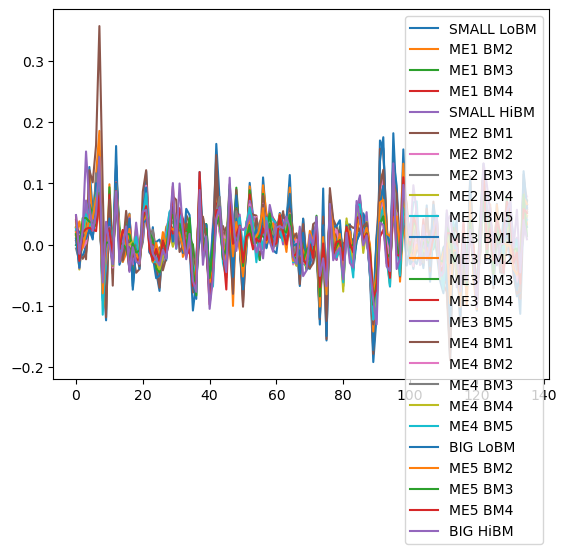

In [333]:
port.plot()

In [336]:
from linearmodels.asset_pricing.model import LinearFactorModel

In [337]:
ff_mod = LinearFactorModel(portfolios=port, 
                       factors=ff[["Mkt-RF", "SMB", "HML"]])
ff_res = ff_mod.fit()

In [340]:
ff_res.full_summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                      LinearFactorModel Estimation Summary                      
================================================================================
No. Test Portfolios:                 25   R-squared:                      0.8932
No. Factors:                          3   J-statistic:                    23.341
No. Observations:                   136   P-value                         0.3827
Date:                  Thu, Jan 25 2024   Distribution:                 chi2(22)
Time:                          07:57:59                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         0.0060     0.0034     1.7658     0.0774     -0.0007      0.0126
SMB            0.0011     0.0019     0.5901     0.5551     -0.0026      0.0048
HML            0.0008     0.0030     0.2545     0.7991     -0.0051      0.0066


                           SMALL LoBM Coefficients                            
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
alpha         -0.0018     0.0019    -0.9472     0.3436     -0.0056      0.0020
Mkt-RF         1.2261     0.0649     18.887     0.0000      1.0988      1.3533
SMB            1.2638     0.1094     11.556     0.0000      1.0494      1.4781
HML           -0.2564     0.0867    -2.9570     0.0031     -0.4264     -0.0865


                             ME1 BM2 Coefficients                             
==============================================================================
alpha          0.0010     0.0013     0.7620     0.4461     -0.0016      0.0036
Mkt-RF         1.0633     0.0461     23.051     0.0000      0.9729      1.1537
SMB            1.1580     0.0891     12.993     0.0000      0.9833      1.3326
HML           -0.0382     0.0579    -0.6598     0.5094     -0.1516      0.0752


                             ME1 BM3 Coefficients                             
==============================================================================
alpha          0.0011     0.0010     1.0745     0.2826     -0.0009      0.0031
Mkt-RF         0.9583     0.0247     38.810     0.0000      0.9099      1.0067
SMB            1.0462     0.0613     17.061     0.0000      0.9260      1.1664
HML            0.0854     0.0421     2.0304     0.0423      0.0030      0.1678


                             ME1 BM4 Coefficients                             
==============================================================================
alpha          0.0012     0.0010     1.2268     0.2199     -0.0007      0.0031
Mkt-RF         0.9352     0.0308     30.376     0.0000      0.8748      0.9955
SMB            1.0050     0.0599     16.775     0.0000      0.8876      1.1224
HML            0.2092     0.0322     6.4897     0.0000      0.1460      0.2724


                           SMALL HiBM Coefficients                            
==============================================================================
alpha          0.0021     0.0009     2.3203     0.0203      0.0003      0.0038
Mkt-RF         0.9333     0.0274     34.044     0.0000      0.8796      0.9871
SMB            0.9618     0.0447     21.531     0.0000      0.8743      1.0494
HML            0.3708     0.0277     13.381     0.0000      0.3164      0.4251


                             ME2 BM1 Coefficients                             
=============================================